In [ ]:
import pandas as pd

Letra A

In [ ]:
pd.read_csv('dataset2.csv')

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,female,33,1.601821,141.973080
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


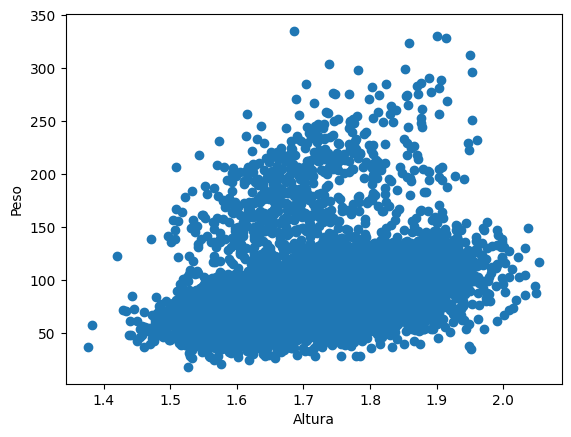

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('dataset2.csv')

x = df['height']
y = df['weight']


plt.scatter(x, y)

plt.xlabel('Altura')
plt.ylabel('Peso')


plt.show()

O que está estranho nesse gráfico são os valores discrepantes de peso, quel além de estarem muito altos não acompanham a tendência do restante do gráfico.

Letra B

A inconsistência é que parte da base de dados estava com outra unidade de massa, em libras. Isso gerou um problema na coluna de massas, além de não deixa-la condizente com a coluna de altura.

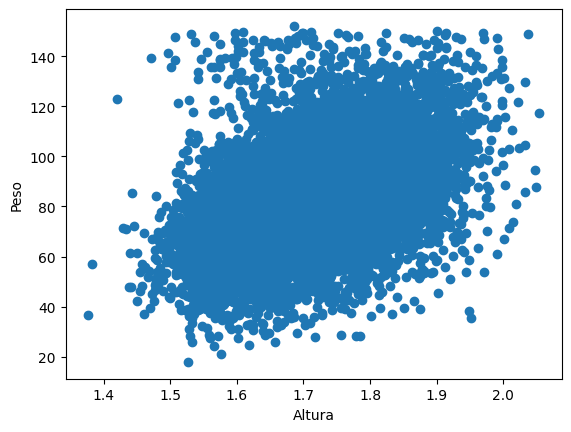

In [ ]:
peso_maior = df.index[df['weight'] > 150]

df.loc[peso_maior, 'weight'] = df.loc[peso_maior, 'weight'] / 2.205
x = df['height']
y = df['weight']


plt.scatter(x, y)

plt.xlabel('Altura')
plt.ylabel('Peso')


plt.show()

In [ ]:
df

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,female,33,1.601821,141.973080
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


Letra C

In [ ]:
df['IMC'] = df['weight'] / ((df['height']) ** 2)

In [ ]:
df

,sex,age,height,weight,IMC
0,M,62,1.874021,114.384199,32.569938
1,F,44,1.672676,76.031332,27.174950
2,F,49,1.587970,46.403086,18.401889
3,F,25,1.653451,104.352744,38.169932
4,M,65,1.744867,76.831890,25.235778
...,...,...,...,...,...
9995,M,68,1.999051,135.605141,33.933486
9996,female,33,1.601821,141.973080,55.332206
9997,M,25,1.926656,131.105269,35.319260
9998,F,32,1.844436,62.475271,18.364586


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Letra D

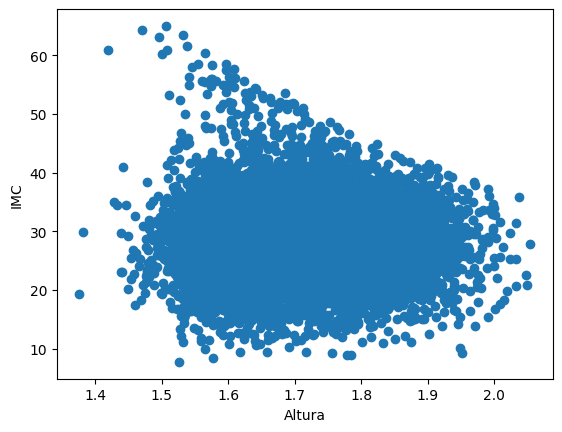

In [ ]:
x = df['height']
y = df['IMC']


plt.scatter(x, y)

plt.xlabel('Altura')
plt.ylabel('IMC')


plt.show()

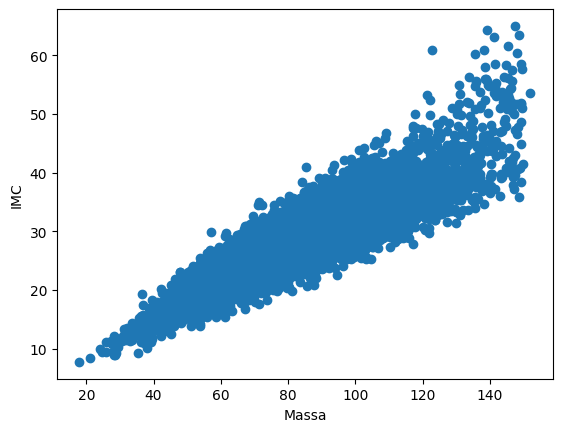

In [ ]:
x = df['weight']
y = df['IMC']


plt.scatter(x, y)

plt.xlabel('Massa')
plt.ylabel('IMC')


plt.show()

O outilier encontrado sao os altos valores de IMC apenas na região esquerda do gráfico, não acompanhando a tendência dos demais pontos.Como esse outlier depende apenas da variável altura, ele é univariado.

Percebe-se que, para alturas entre 1.4 e 1.7, os IMC acima de 48, aproximadamente, não acompanham a tendência do restante do gráfico, por isso é razoável excluir esses valores.

In [ ]:
df.loc[df['IMC'] > 48, 'IMC'] = None

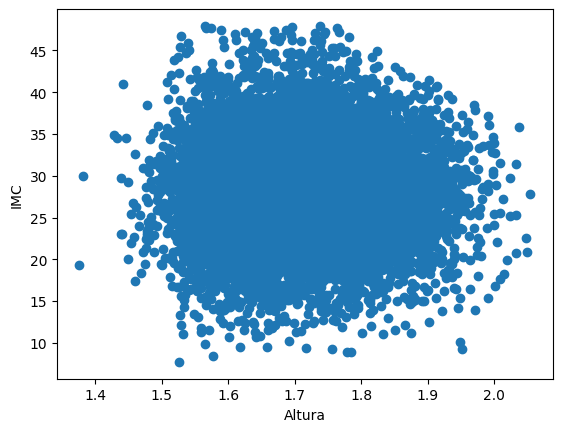

In [ ]:
x = df['height']
y = df['IMC']


plt.scatter(x, y)

plt.xlabel('Altura')
plt.ylabel('IMC')


plt.show()

Letra E

In [ ]:
n_saudavel = df[df['IMC'] > 24.9]

# Calcular a quantidade de valores maiores que 24.9
quant_n_saudavel = len(n_saudavel)

per_n_saudavel = ((quant_n_saudavel)/100000)*100

print(f"A quantidade de valores maiores que 24.9 é: {per_n_saudavel}")

A quantidade de valores maiores que 24.9 é: 7.099


Letra F

In [ ]:
df['sex'] = df['sex'].replace({'male': 'M', 'female': 'F'})

In [ ]:
import seaborn as sns

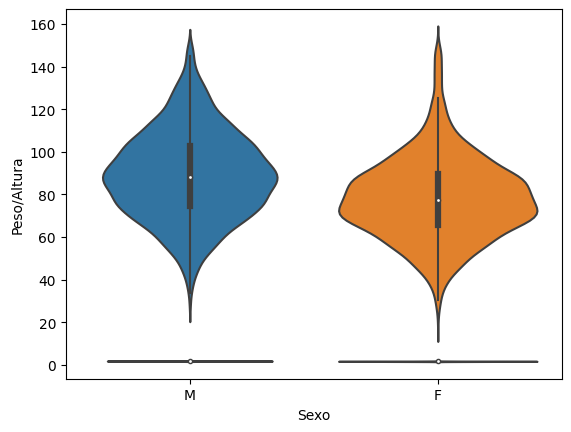

In [ ]:
sns.violinplot(data=df, x='sex', y='weight')
sns.violinplot(data=df, x='sex', y='height')


plt.xlabel('Sexo')
plt.ylabel('Peso/Altura')


plt.show()

A distribuição mostrada nos gráficos faz sentido, já que os valores intermediários são os que apresentam maior frequência.